# Analyze Log

### Import modules

In [40]:
import pandas as pd
import pm4py
from py_script.import_log import get_Event_Log
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


### Import

In [41]:
log = get_Event_Log('../data/log.csv')
log


,case:concept:name,concept:name,time:timestamp,Device
0,1,Instanz gestartet,2023-05-15 09:38:00+00:00,Workstation
1,1,Ticket öffnen,2023-05-15 10:00:00+00:00,Workstation
2,1,Incident registrieren,2023-05-15 10:15:00+00:00,Workstation
3,1,Incident klassifizieren,2023-05-15 10:32:00+00:00,Workstation
4,1,Incident beheben,2023-05-15 12:30:00+00:00,Workstation
...,...,...,...,...
106,9,Incident registrieren,2023-05-15 10:15:00+00:00,Workstation
107,9,Incident klassifizieren,2023-05-15 10:32:00+00:00,Workstation
108,9,Incident beheben,2023-05-15 12:30:00+00:00,Workstation
109,9,Reporting über Incident abschließen,2023-05-15 12:58:00+00:00,Workstation


### Case Variants

In [42]:
variants = pm4py.get_variants_as_tuples(log)
variants


{('Instanz gestartet',
  'Ticket öffnen',
  'Incident registrieren',
  'Incident klassifizieren',
  'Incident beheben',
  'Reporting über Incident abschließen',
  'Anwender über die Behebung des Incidents informieren'): 9,
 ('Instanz gestartet',
  'Ticket öffnen',
  'Incident registrieren',
  'Incident klassifizieren',
  'Problem beheben',
  'Incident beheben',
  'Reporting über Incident abschließen',
  'Anwender über die Behebung des Incidents informieren'): 3,
 ('Instanz gestartet',
  'Ticket öffnen',
  'Incident registrieren',
  'Incident klassifizieren',
  'Problem beheben',
  'Incident beheben',
  'Anwender über die Behebung des Incidents informieren',
  'Reporting über Incident abschließen'): 3}

### Average Duration

In [43]:
case_durations = pm4py.get_all_case_durations(log)
number_cases = len(case_durations)
sum_duration = 0

for duration in case_durations:
    sum_duration = sum_duration+duration

average_case_duration = sum_duration/60/number_cases
print(average_case_duration, 'min')


305.3333333333333 min


### Case Duration

In [44]:
case_durations = pm4py.get_all_case_durations(log)
i = 0
for case in case_durations:
    print("Duration Case", i+1, case/60, "min |", case, "sec")
    i = i+1


Duration Case 1 197.0 min | 11820.0 sec
Duration Case 2 197.0 min | 11820.0 sec
Duration Case 3 207.0 min | 12420.0 sec
Duration Case 4 207.0 min | 12420.0 sec
Duration Case 5 212.0 min | 12720.0 sec
Duration Case 6 212.0 min | 12720.0 sec
Duration Case 7 212.0 min | 12720.0 sec
Duration Case 8 222.0 min | 13320.0 sec
Duration Case 9 222.0 min | 13320.0 sec
Duration Case 10 437.0 min | 26220.0 sec
Duration Case 11 447.0 min | 26820.0 sec
Duration Case 12 447.0 min | 26820.0 sec
Duration Case 13 447.0 min | 26820.0 sec
Duration Case 14 457.0 min | 27420.0 sec
Duration Case 15 457.0 min | 27420.0 sec


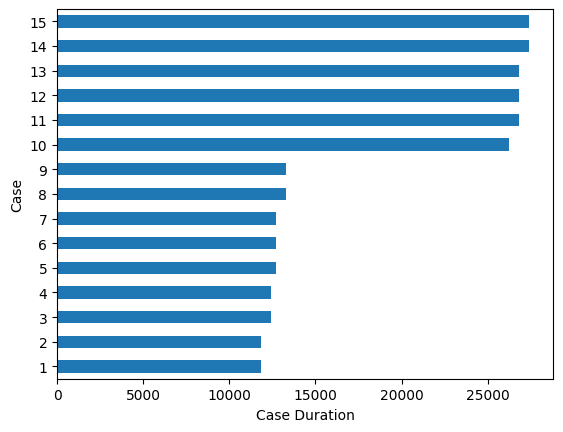

In [45]:
case_id = []
i = 1
for case in case_durations:
    case_id.append(i)
    i = i+1

df = pd.DataFrame(list(zip(case_id, case_durations)),
                  columns=['case_id', 'duration'])
df.plot(kind='barh', x='case_id', y='duration',
        ylabel="Case", xlabel='Case Duration', legend=False)
plt.show()


### Visualize Directly Follows Graph

#### DFG

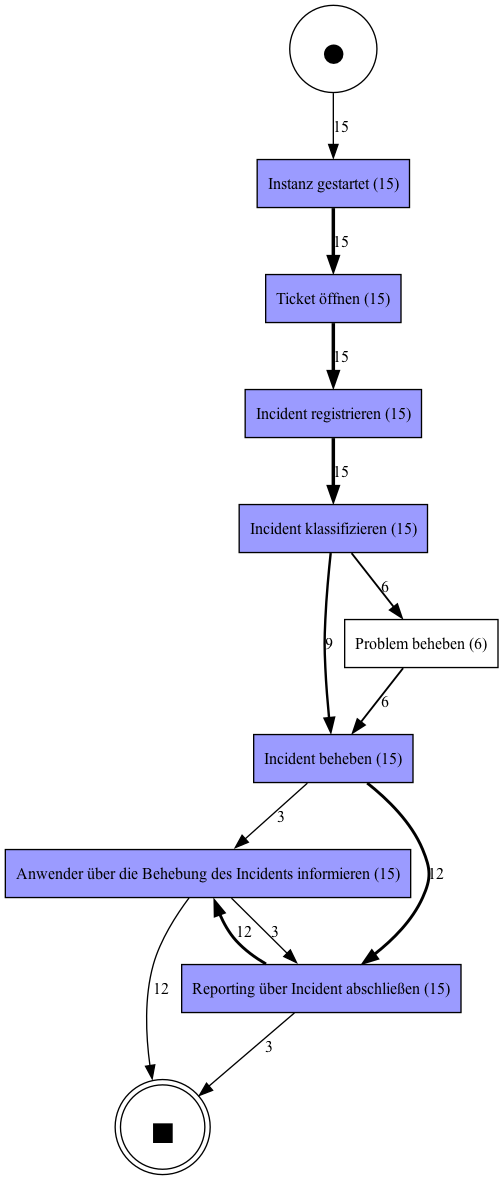

In [46]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)


#### Performance DFG

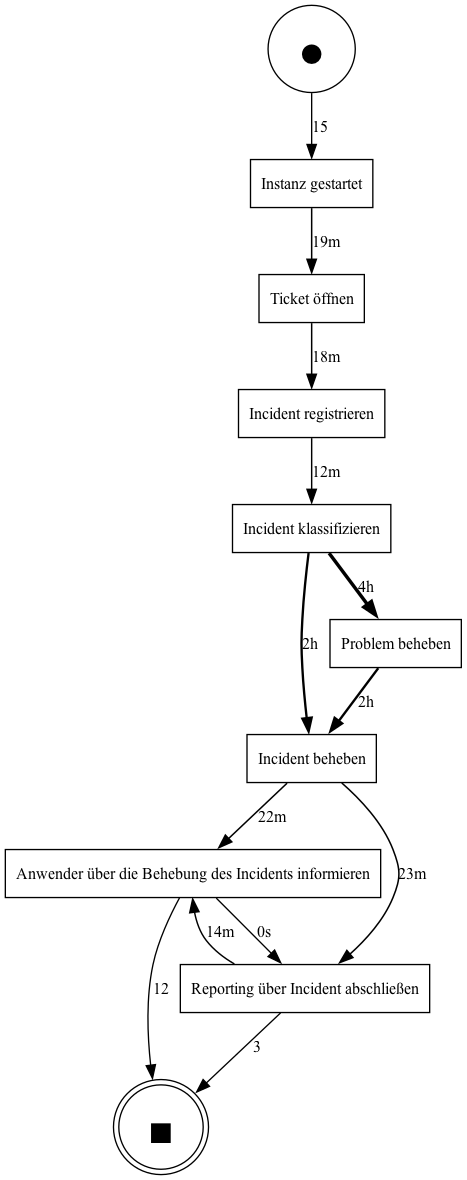

In [47]:
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(
    log)
pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities,)


### Filter Event Log by Case Duration > 3.000 sec

In [48]:
filtered_dataframe = pm4py.filter_case_performance(log, 15000.0, 30000.0)
filtered_dataframe = filtered_dataframe[filtered_dataframe['concept:name']
                                        == 'Problem beheben']

print(filtered_dataframe[['case:concept:name', 'concept:name', 'Device']])
print('Anzahl der Cases', len(filtered_dataframe.index))

   case:concept:name     concept:name  Device
11                10  Problem beheben    iPad
19                11  Problem beheben    iPad
27                12  Problem beheben  iPhone
35                13  Problem beheben  iPhone
43                14  Problem beheben  iPhone
51                15  Problem beheben    iPad
Anzahl der Cases 6


### Get Devices

In [59]:
devices = log['Device'].drop_duplicates()
devices 

0     Workstation
7            iPad
23         iPhone
Name: Device, dtype: object

### Filter Event Log by Activity

In [ ]:
filter = log[log['concept:name'] == 'Problem beheben']
filter


,case:concept:name,concept:name,time:timestamp,Device,start_timestamp
11,10,Problem beheben,2023-05-15 14:25:00+00:00,iPad,2023-05-15 14:25:00+00:00
19,11,Problem beheben,2023-05-15 14:40:00+00:00,iPad,2023-05-15 14:40:00+00:00
27,12,Problem beheben,2023-05-15 14:44:00+00:00,iPhone,2023-05-15 14:44:00+00:00
35,13,Problem beheben,2023-05-15 14:40:00+00:00,iPhone,2023-05-15 14:40:00+00:00
43,14,Problem beheben,2023-05-15 14:40:00+00:00,iPhone,2023-05-15 14:40:00+00:00
51,15,Problem beheben,2023-05-15 14:40:00+00:00,iPad,2023-05-15 14:40:00+00:00


### Further Log Visualization

In [ ]:
# pm4py.view_events_per_time_graph(log)
# pm4py.view_case_duration_graph(log)
# pm4py.view_events_distribution_graph(log)
# pm4py.view_dotted_chart(log)
